In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(1)

# Read data
df = pd.read_csv('https://raw.githubusercontent.com/sahdan96/covid19/main/covid_data.csv')
future_df = df[-3:]
df = df[:-3]

In [3]:
# Display data
df

,Date,Day,Daily,Cummulative,discharged,death,icu
0,24/1/2020,1,3,0,0,0,0
1,25/1/2020,2,3,3,0,0,0
2,26/1/2020,3,1,4,0,0,0
3,27/1/2020,4,0,4,0,0,0
4,28/1/2020,5,0,4,0,0,0
...,...,...,...,...,...,...,...
341,30/12/2020,342,1870,110485,87460,463,131
342,31/12/2020,343,2525,113010,88941,471,131
343,1/1/2021,344,2068,115078,91171,474,126
344,2/1/2021,345,2295,117373,94492,483,125


In [4]:
# Turn unsupervised dataset into supervised dataset
future_days = 30

df = df[['Daily']]
df['Predictions'] = df[['Daily']].shift(-future_days)
df['Predictions']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
341    NaN
342    NaN
343    NaN
344    NaN
345    NaN
Name: Predictions, Length: 346, dtype: float64

In [5]:
# Train feature (Daily)
X = np.array(df.drop(['Predictions'],1))[:-future_days]
X

array([[   3],
       [   3],
       [   1],
       [   0],
       [   0],
       [   3],
       [   1],
       [   0],
       [   0],
       [   0],
       [   0],
       [   2],
       [   2],
       [   0],
       [   0],
       [   4],
       [   0],
       [   2],
       [   0],
       [   0],
       [   1],
       [   0],
       [   3],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   1],
       [   0],
       [   2],
       [   4],
       [   0],
       [   7],
       [  14],
       [   0],
       [  33],
       [  10],
       [   6],
       [  18],
       [  12],
       [  20],
       [   0],
       [  48],
       [  41],
       [ 190],
       [ 138],
       [ 107],
       [ 117],
       [ 110],
       [ 130],
       [ 153],
       [ 123],
       [ 212],
       [ 106],
       [ 172],
       [ 235],
       [ 130],
       [ 159],
       [ 150],
       [ 1

In [6]:
# Value to predict
y = np.array(df['Predictions'])[:-future_days]
y

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       2.000e+00, 4.000e+00, 0.000e+00, 7.000e+00, 1.400e+01, 0.000e+00,
       3.300e+01, 1.000e+01, 6.000e+00, 1.800e+01, 1.200e+01, 2.000e+01,
       0.000e+00, 4.800e+01, 4.100e+01, 1.900e+02, 1.380e+02, 1.070e+02,
       1.170e+02, 1.100e+02, 1.300e+02, 1.530e+02, 1.230e+02, 2.120e+02,
       1.060e+02, 1.720e+02, 2.350e+02, 1.300e+02, 1.590e+02, 1.500e+02,
       1.560e+02, 1.400e+02, 1.420e+02, 2.080e+02, 2.170e+02, 1.500e+02,
       1.790e+02, 1.310e+02, 1.700e+02, 1.560e+02, 1.090e+02, 1.180e+02,
       1.840e+02, 1.530e+02, 1.340e+02, 1.700e+02, 8.500e+01, 1.100e+02,
       6.900e+01, 5.400e+01, 8.400e+01, 3.600e+01, 5.700e+01, 5.000e+01,
       7.100e+01, 8.800e+01, 5.100e+01, 3.800e+01, 4.000e+01, 3.100e+01,
       9.400e+01, 5.700e+01, 6.900e+01, 1.050e+02, 1.220e+02, 5.500e+01,
       3.000e+01, 4.500e+01, 3.900e+01, 6.800e+01, 5.400e+01, 6.700e+01,
       7.000e+01, 1.600e+01, 3.700e+01, 4.000e+01, 

In [7]:
# Splot dataset to train and test database
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Define models
rf = RandomForestRegressor().fit(x_train, y_train)

tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [9]:
# Predict test database
rf_prediction = rf.predict(x_test)
tree_prediction = tree.predict(x_test)
lr_prediction = lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


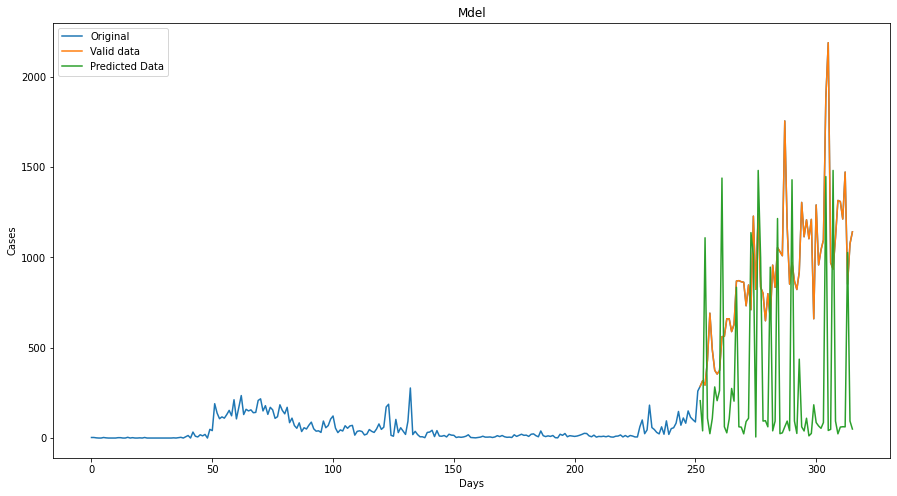

In [10]:
# Plot Random forest
predictions = rf_prediction
valid = df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Mdel')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

In [11]:
# Benchmark
print('Decision Tree:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,tree_prediction))}")
print(f"Rsquared: {r2_score(y_test,tree_prediction)}")
print()

Decision Tree:
RMSE: 357.1641507620264
Rsquared: 0.5979146553574781



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


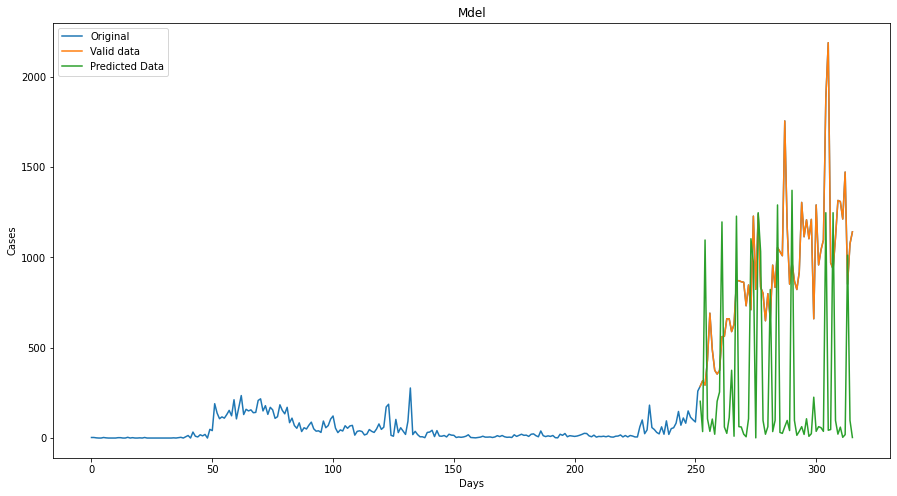

In [12]:
# Plot decision tree
predictions = tree_prediction
valid = df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Mdel')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

In [13]:
# Random fores
print('Benchmarking:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,rf_prediction))}")
print(f"Rsquared: {r2_score(y_test,rf_prediction)}")
print()

Benchmarking:
RMSE: 333.0519411684911
Rsquared: 0.6503717956864277



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


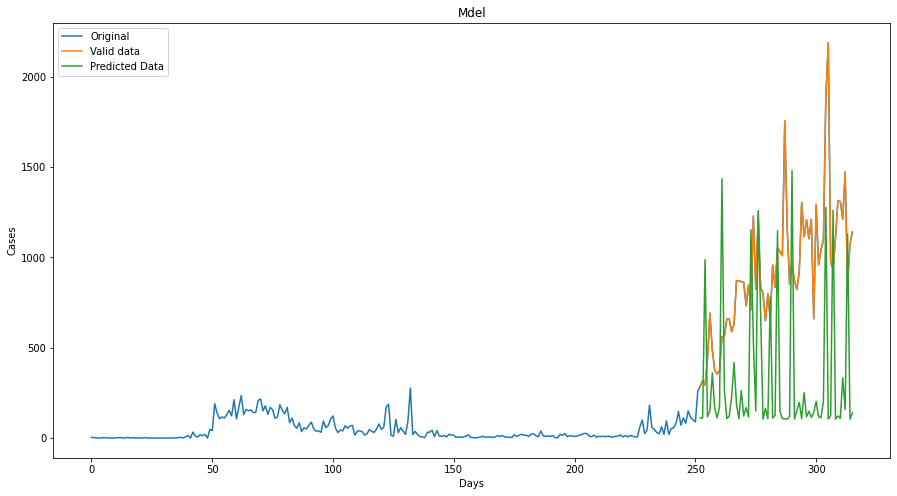

In [14]:
# Plot Linear Regression
predictions = lr_prediction
valid = df[x_train.shape[0]:-future_days]
valid['Predictions'] = predictions
plt.figure(figsize=(15,8))
plt.title('Mdel')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(df['Daily'][:-future_days])
plt.plot(valid[['Daily', 'Predictions']])
plt.legend(['Original', 'Valid data', 'Predicted Data'])
plt.show()

In [15]:
# inear Regression
print('Linear Regression:')
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,lr_prediction))}")
print(f"Rsquared: {r2_score(y_test,lr_prediction)}")
print()

Linear Regression:
RMSE: 312.15627767136795
Rsquared: 0.6928668685144496



In [16]:
X_2021 = np.array([2200 , 3600, 6100]).reshape(-1,1)

In [17]:
tree_fut = tree.predict(X_2021)
rf_fut = rf.predict(X_2021)
lr_fut = lr.predict(X_2021)

In [18]:
print(tree_fut)
print(rf_fut)
print(lr_fut)

[1581. 1581. 1581.]
[1569.42 1569.42 1569.42]
[2757.67719505 4446.34860548 7461.83326696]
